In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from post_processing_multi import * # Import data post processing functions
from plotting_helper_RQC import * # Import helper functions for plotting in ipynb
warnings.filterwarnings('ignore') # supress warnings for clenliness


In [2]:
base_folder = "./RQC_runs/all_qubits/"
folders = [base_folder]
tags = ['_LinGrow']
budgies = [ [None],
            {50000,  1000,   333,   500,   250,   166,   125,   100,    83, 55,    41,    33,    27,
             500000,  10000,   3333,   5000,   2500,   1666,   1250,   1000, 833,    555,    416,    333,    277,
             5000000,  100000,   33333,   50000,   25000,   16666,   12500, 10000,    8333,    5555,    4166,    3333,    2777 ,
             50000000,  1000000,   333333,   500000,   250000,   166666, 125000,   100000,    83333,    55555,    41666,    33333, 27777,
             500000000,  10000000,   3333333,   5000000,   2500000,   1666666, 1250000,   1000000,    833333,    555555,    416666,    333333, 277777,
             10000000000, 5000000000,  100000000,   33333333,   50000000,   25000000,   16666666, 12500000,   10000000,    8333333,    5555555,    4166666,    3333333, 2777777,
             50000000000,  1000000000,   333333333,   500000000,   250000000,   166666666, 125000000,   100000000,    83333333,    55555555,    41666666,    33333333, 27777777,
             }]
budge_abs,budge_res,budge_val = load_multiple_files_budget([4,4,6,6,8,8,10],[4,4*16,6,6*16,8,8*16,10],30,nlsp_list = [1,2,3],N=10,Nts=100,max_copies=6,tags=tags,
                               density_matrices = False,shots=budgies,folders = folders,train=True,budgets=[0,5],train_use=100)
NLSP3FULL_abs = budge_abs
NLSP3HALF_abs  ,_,_ = load_multiple_files_budget([4,4,6,6,8,8,10],[4,4*16,6,6*16,8,8*16,10],30,nlsp_list = [1,2,3],N=10,Nts=100,max_copies=6,tags=tags,
                               density_matrices = False,shots=budgies,folders = folders,train=True,budgets=[0,5],train_use=50) 

_LinGrow
Qubit: 4, depth: 4, budget:0
Qubit: 4, depth: 64, budget:0
Qubit: 6, depth: 6, budget:0
Qubit: 6, depth: 96, budget:0
Qubit: 8, depth: 8, budget:0
Qubit: 8, depth: 128, budget:0
Qubit: 10, depth: 10, budget:0
Qubit: 4, depth: 4, budget:5
Qubit: 4, depth: 64, budget:5
Qubit: 6, depth: 6, budget:5
Qubit: 6, depth: 96, budget:5
Qubit: 8, depth: 8, budget:5
Qubit: 8, depth: 128, budget:5
Qubit: 10, depth: 10, budget:5
_LinGrow
Qubit: 4, depth: 4, budget:0
Qubit: 4, depth: 64, budget:0
Qubit: 6, depth: 6, budget:0
Qubit: 6, depth: 96, budget:0
Qubit: 8, depth: 8, budget:0
Qubit: 8, depth: 128, budget:0
Qubit: 10, depth: 10, budget:0
Qubit: 4, depth: 4, budget:5
Qubit: 4, depth: 64, budget:5
Qubit: 6, depth: 6, budget:5
Qubit: 6, depth: 96, budget:5


In [2]:
NLSP3FULL_abs  = NLSP3FULL_abs.assign(description =  '3nlsp_full')
NLSP3HALF_abs  = NLSP3HALF_abs.assign(description =  '3nlsp_half')

NameError: name 'NLSP3FULL_abs' is not defined

In [31]:
everything= pd.concat([NLSP3FULL_abs,NLSP3HALF_abs])


In [32]:
everything['type']=everything['type'].str.replace('_LinGrow','')

In [3]:
everything = pd.read_pickle("./RQC_runs/checkpoint.pkl")

In [22]:
rqc_half_df = filter_budget(everything.query('description=="3nlsp_half"'),[0,10**5,10**6,10**7,10**8,10**9,10**10,10**11],5)
rqc_half_df['volume'] = rqc_half_df.depth*rqc_half_df.Qubits*rqc_half_df.Qubits
rqc_half_df["g"] = rqc_half_df.depth//rqc_half_df.Qubits
#rqc_half_df.to_csv('./RQC_runs/filtered_rqc_half_data.csv')

In [15]:
rqc_full_df = filter_budget(everything.query('description=="3nlsp_full"'),[0,10**5,10**6,10**7,10**8,10**9,10**10,10**11],100)
rqc_full_df['volume'] = rqc_full_df.depth*rqc_full_df.Qubits*rqc_full_df.Qubits
rqc_full_df["g"] = rqc_full_df.depth//rqc_full_df.Qubits


In [23]:
filtered_rqc = pd.concat([rqc_full_df,rqc_half_df])

In [11]:
filtered_rqc = pd.read_pickle('./RQC_runs/filtered_data.pkl')

In [37]:
mean = plot_df.groupby(['Qubits','g','type','description','budget']).aggregate('max').drop(['copies','nlsp','volume','depth'],axis=1).reset_index()
mean = mean.reset_index().query('g==1')


In [38]:
mean = mean.query('budget==0|budget==10**10')
mean.to_csv('./dataframes/training_set_difference_max.csv')

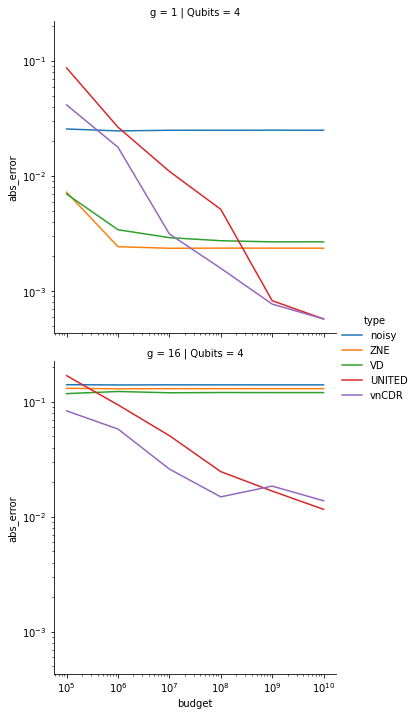

In [24]:
df = filtered_rqc.query('Qubits==4 & description == "3nlsp_half"')

zero_copy_methods = df.query(
    'abs_error > 0  & copies == 1 & nlsp==1  & res_type=="abs_error" & ( type == "ZNE" )'
)
vnCDR = df.query('type == "vnCDR"&abs_error > 0  & copies == 1 & nlsp==1  & res_type=="abs_error"')
noisy = df.query(
    'abs_error > 0  & copies == 1 & nlsp==1 & res_type=="abs_error" & ( type=="VD")'
)
few_copy_methods = df.query(
    'abs_error >  0  & nlsp==1 & copies==2 & res_type=="abs_error" & ( type=="VD")'
)
many_copy_methods = df.query(
    'abs_error > 0  &nlsp==1  & copies==3 & res_type=="abs_error" & ( type=="UNITED")'
)
# vnCDR['budget']=vnCDR['budget']//10
# many_copy_methods['budget']=many_copy_methods['budget']//10
noisy["type"] = "noisy"
plot_df = pd.concat(
    [noisy, zero_copy_methods, few_copy_methods, many_copy_methods,vnCDR],
    axis=0,
    ignore_index=True,
)
fig = sns.relplot(
    data=plot_df.reset_index().query('budget>10**4&budget<10**11'),
    kind="line",
    x="budget",
    y="abs_error",
    hue="type",
    col="Qubits",
    row = 'g',
    estimator="mean",
    markers=True,
    ci=None).set(xscale='log',yscale='log')

In [28]:
write = plot_df.drop(['shots','copies','nlsp','seed','depth','volume'],axis=1).groupby(['Qubits','budget','type','g']).aggregate('median').reset_index().query('Qubits==4')
write.to_csv('plot_dataframes/RQC_median.csv')

In [11]:
fig = sns.relplot(
    data=write.reset_index().query('budget>10**4&budget<10**11'),
    kind="line",
    x="budget",
    y="abs_error",
    hue="type",
    col="Qubits",
    row = 'g',
    estimator="median",
    markers=True,
    ci=None).set(xscale='log',yscale='log')

NameError: name 'write' is not defined

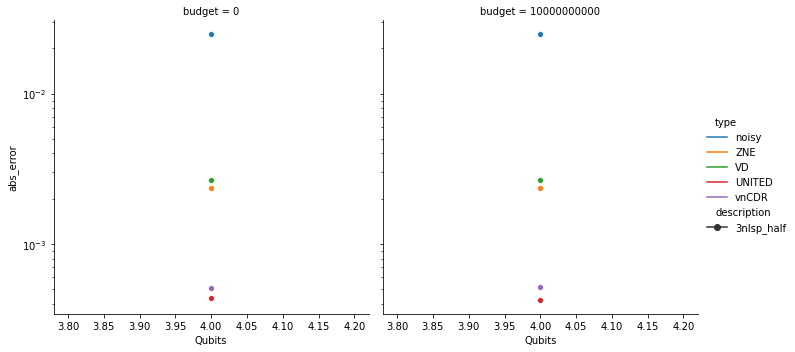

In [31]:

df = filtered_rqc
zero_copy_methods = df.query(
    'abs_error > 0  & copies == 1 & nlsp==1  & res_type=="abs_error" & ( type == "ZNE" | type == "vnCDR")'
)
few_copy_methods = df.query(
    'abs_error >  0  & nlsp==1 & copies==2 & res_type=="abs_error" & ( type=="VD")'
)
many_copy_methods = df.query(
    'abs_error > 0  &nlsp==1  & copies==3& res_type=="abs_error" & ( type=="UNITED")'
)
noisy["type"] = "noisy"
RQC_budget = pd.concat(
    [noisy, zero_copy_methods, few_copy_methods, many_copy_methods],
    axis=0,
    ignore_index=True)
RQC_budget=RQC_budget.drop(['shots','copies','nlsp','seed','depth','volume'],axis=1).groupby(['description','type','g','budget','Qubits']).aggregate('max').reset_index()
fig = sns.relplot(
    data=plot_df.reset_index().query('(budget==0|budget==10**10)&g==1'),
    kind="line",
    y="abs_error",
    x="Qubits",
    hue="type",
    style='description',
    col="budget",
    col_wrap=2,
    markers=True,
    ci=None).set(yscale='log')

In [53]:
RQC_budget.to_csv('./plot_dataframes/MaxTrainingExample.csv')


In [26]:
RQC_budget=RQC_budget.reset_index().drop(['copies','nlsp','depth','volume'],axis=1).reset_index()

In [27]:
RQC_budget.drop('Qubits',axis=1).query('budget>0&budget<10**11&(budget==10**5|budget==10**6|budget==10**8|budget==10**10)').to_csv('./dataframes/Fig2_MEDIAN.csv')

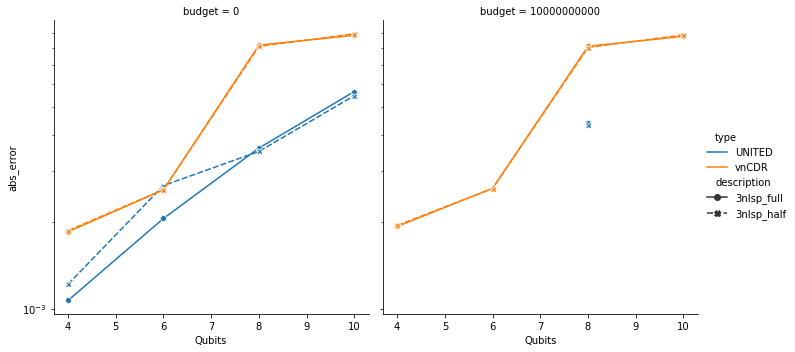

In [40]:
df = filtered_rqc


zero_copy_methods = df.query(
    'abs_error > 0  & copies == 1 & nlsp==1  & res_type=="abs_error" & ( type == "ZNE" )'
)
vnCDR = df.query('type == "vnCDR"&abs_error > 0  & copies == 1 & nlsp==1  & res_type=="abs_error"')
noisy = df.query(
    'abs_error > 0  & copies == 1 & nlsp==1 & res_type=="abs_error" & ( type=="VD")'
)
few_copy_methods = df.query(
    'abs_error >  0  & nlsp==1 & copies==2 & res_type=="abs_error" & ( type=="VD")'
)
many_copy_methods = df.query(
    'abs_error > 0  &nlsp==1  & copies==2 & res_type=="abs_error" & ( type=="UNITED")'
)
vnCDR['budget']=vnCDR['budget']//10
many_copy_methods['budget']=many_copy_methods['budget']//10
noisy["type"] = "noisy"
plot_df = pd.concat(
    [many_copy_methods,vnCDR],
    axis=0,
    ignore_index=True,
)
fig = sns.relplot(
    data=plot_df.reset_index().query('(budget==0|budget==10**10)&g==1'),
    kind="line",
    y="abs_error",
    x="Qubits",
    hue="type",
    style='description',
    col="budget",
    estimator='max', 
    col_wrap=2,
    markers=True,
    ci=None).set(yscale='log')